In [1]:
import scipy.ndimage
import psi4
import pdft
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import libcubeprop
import numpy as np
import pickle

In [20]:
data = pickle.load(open( "save3.p", "rb" ) )

In [21]:
f1e = np.array(data['f1_energy'])
f2e = np.array(data['f2_energy'])

x = np.array(data['x'])
y = np.array(data['y'])

nuclear_nad = np.array(data['nuclear_nad'])
ep = np.array(data['ep'])

nuclear_nad

array([2.        , 1.88235294, 1.77777778, 1.68421053, 1.6       ])

PBE benchmark.

In [8]:
energy_pbe = []
psi4.set_options({
    'REFERENCE': 'UKS'
})
for bondlength in x:
    print("============%f==============" % bondlength)
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))
    
    E = psi4.energy("pbe/aug-cc-pvdz")
    
    energy_pbe.append(E*2)

============4.000000==============
============4.250000==============
============4.500000==============
============4.750000==============
============5.000000==============


In [35]:
psi4.set_options({
    'REFERENCE': 'UKS'
})
bondlength = 60
print("============%f==============" % bondlength)
Full_Molec =  psi4.geometry("""
nocom
noreorient
He %f 0.0 0.00
He -%f 0.0 0.00
units bohr
symmetry c1
""" % (bondlength / 2, bondlength / 2))

E = psi4.energy("pbe/aug-cc-pvdz", molecule=Full_Molec)
print(E)
energy_pbe.append(E*2)

============60.000000==============
-5.774087411731994


In [22]:
energy_pbe + y

array([-11.54781447, -11.54872747, -11.54910098, -11.5492156 ,
       -11.54917978])

In [33]:
energy_pbe[-1]/2*2*np.pi

-36.27967680050426

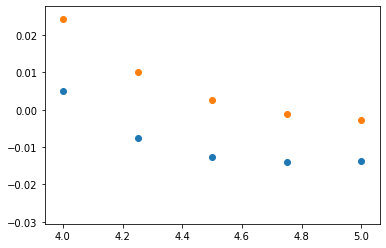

In [30]:
fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(x, (energy_pbe[:-1] + y - energy_pbe[-1])/2*27.2114) # eV
ax2.scatter(x, (np.array(energy_pbe[:-1]) - energy_pbe[-1])/2*27.2114) # eV

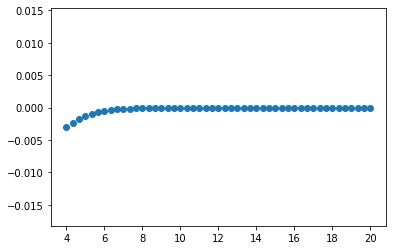

In [9]:
fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(x, y + energy_pbe - (y + energy_pbe)[-1])